# Análisis Nº 1 (sin incluir estatus legal)

In [76]:
#Importación de librerías
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show
import pandas as pd

In [80]:
#Lectura del archivo
df = pd.read_excel('warwick.xlsx')
df.head()

,localidad,proyecto,indicador_de_carga,fecha_aplicacion,edad,genero,poblacion_local_extranjera,fase_test,puntuacion_pretest,me_he_sentido_optimista,...,he_podido_pensar_con_claridad,me_he_sentido_bien_conmigo,me_he_sentido_cercano,me_he_sentido_seguro_con_confianza,he_sido_capaz_de_tomar_decisiones,me_he_sentido_querido,me_he_interesado_por_nuevas_cosas,me_he_sentido_alegre,puntuacion_total_items,aumento_de_bienestar
0,Machiques,ACNUR,NaN,2021-08-12,46,Femenino,NaN,Pretest,NaN,Muy pocas veces,...,Muy pocas veces,Muy pocas veces,Muy pocas veces,Muy pocas veces,Algunas veces,Algunas veces,Muy pocas veces,Muy pocas veces,32,NaN
1,Amazonas,ACNUR,NaN,2021-08-25,26,Femenino,NaN,Pretest,NaN,Algunas veces,...,Algunas veces,Siempre,Siempre,Siempre,Siempre,Algunas veces,Siempre,Algunas veces,54,NaN
2,Amazonas,ACNUR,NaN,2021-08-23,54,Femenino,NaN,Pretest,NaN,Muy pocas veces,...,A menudo,Algunas veces,Muy pocas veces,Muy pocas veces,Muy pocas veces,Algunas veces,Algunas veces,Algunas veces,36,NaN
3,Amazonas,ACNUR,NaN,2021-08-23,36,Femenino,NaN,Pretest,NaN,Algunas veces,...,Algunas veces,Muy pocas veces,Algunas veces,Muy pocas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,37,NaN
4,Machiques,ACNUR,NaN,2021-08-03,30,Femenino,NaN,Pretest,NaN,Muy pocas veces,...,Muy pocas veces,Muy pocas veces,Muy pocas veces,Muy pocas veces,Algunas veces,Muy pocas veces,Muy pocas veces,Muy pocas veces,33,NaN


In [83]:
#Filtrado de la fase del test al postest (recordar que en postest se incluye el campo de la puntación del pretest)
df_filtrado = df[df['fase_test']=='Postest']
df_filtrado

,localidad,proyecto,indicador_de_carga,fecha_aplicacion,edad,genero,poblacion_local_extranjera,fase_test,puntuacion_pretest,me_he_sentido_optimista,...,he_podido_pensar_con_claridad,me_he_sentido_bien_conmigo,me_he_sentido_cercano,me_he_sentido_seguro_con_confianza,he_sido_capaz_de_tomar_decisiones,me_he_sentido_querido,me_he_interesado_por_nuevas_cosas,me_he_sentido_alegre,puntuacion_total_items,aumento_de_bienestar
21,San Antonio,BPRM 2020-2021,NaN,2021-09-15,38,Femenino,NaN,Postest,39.0,A menudo,...,A menudo,Algunas veces,Algunas veces,Algunas veces,A menudo,Algunas veces,Algunas veces,Algunas veces,49,El participante aumentó su bienestar
22,San Antonio,BPRM 2020-2021,NaN,2021-09-14,49,Femenino,NaN,Postest,46.0,A menudo,...,A menudo,Siempre,Siempre,Siempre,Siempre,Siempre,Siempre,A menudo,61,El participante aumentó su bienestar
23,San Antonio,BPRM 2020-2021,NaN,2021-09-14,50,Femenino,NaN,Postest,38.0,Algunas veces,...,Algunas veces,A menudo,Siempre,Algunas veces,Algunas veces,Algunas veces,A menudo,A menudo,49,El participante aumentó su bienestar
45,Machiques,ACNUR,NaN,2021-09-17,20,Femenino,NaN,Postest,29.0,A menudo,...,A menudo,A menudo,A menudo,A menudo,Siempre,Siempre,A menudo,A menudo,61,El participante aumentó su bienestar
46,Machiques,ACNUR,NaN,2021-09-17,30,Femenino,NaN,Postest,33.0,A menudo,...,A menudo,Siempre,Siempre,A menudo,Siempre,A menudo,A menudo,A menudo,62,El participante aumentó su bienestar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Puerto Ordaz,ACNUR,NaN,2022-04-27,39,Femenino,Población local,Postest,29.0,Muy pocas veces,...,Muy pocas veces,Algunas veces,Muy pocas veces,Muy pocas veces,Nunca,A menudo,Algunas veces,Algunas veces,35,El participante aumentó su bienestar
2124,San Cristóbal,Proyecto SEDE (2021-2022),C04,2022-05-12,36,Femenino,Población local,Postest,35.0,Algunas veces,...,Algunas veces,A menudo,A menudo,Algunas veces,A menudo,A menudo,A menudo,A menudo,49,El participante aumentó su bienestar
2125,Machiques,BPRM (2021-2022),NaN,2022-04-28,34,Femenino,Refugiado o solicitante de refugio,Postest,45.0,Siempre,...,Siempre,Siempre,Siempre,Siempre,Siempre,Siempre,Siempre,Siempre,68,El participante aumentó su bienestar
2126,San Cristóbal,Proyecto SEDE (2021-2022),C04,2022-05-11,29,Femenino,Población local,Postest,32.0,Algunas veces,...,Algunas veces,A menudo,A menudo,A menudo,A menudo,Algunas veces,Algunas veces,Algunas veces,49,El participante aumentó su bienestar


In [84]:
df_d = df_filtrado.drop(['poblacion_local_extranjera','me_he_sentido_optimista','me_he_sentido_util','me_he_sentido_relajado', 'he_sentido_interes_por_los_demas','he_tenido_energia_de_sobra','he_afrontado_bien_los _problemas','he_podido_pensar_con_claridad',
'me_he_sentido_bien_conmigo','me_he_sentido_cercano','me_he_sentido_seguro_con_confianza','he_sido_capaz_de_tomar_decisiones',
'me_he_sentido_querido','me_he_interesado_por_nuevas_cosas','me_he_sentido_alegre','aumento_de_bienestar',
'indicador_de_carga','fecha_aplicacion'], axis=1)
df_d.head()

,localidad,proyecto,edad,genero,fase_test,puntuacion_pretest,puntuacion_total_items
21,San Antonio,BPRM 2020-2021,38,Femenino,Postest,39.0,49
22,San Antonio,BPRM 2020-2021,49,Femenino,Postest,46.0,61
23,San Antonio,BPRM 2020-2021,50,Femenino,Postest,38.0,49
45,Machiques,ACNUR,20,Femenino,Postest,29.0,61
46,Machiques,ACNUR,30,Femenino,Postest,33.0,62


In [13]:
#Renombre de columnas
df_dd = df_d.rename(columns={'puntuacion_pretest':'puntuacion_pre','puntuacion_total_items':'puntuacion_post'})
df_dd.head()

,localidad,proyecto,edad,genero,fase_test,puntuacion_pre,puntuacion_post
21,San Antonio,BPRM 2020-2021,38,Femenino,Postest,39.0,49
22,San Antonio,BPRM 2020-2021,49,Femenino,Postest,46.0,61
23,San Antonio,BPRM 2020-2021,50,Femenino,Postest,38.0,49
45,Machiques,ACNUR,20,Femenino,Postest,29.0,61
46,Machiques,ACNUR,30,Femenino,Postest,33.0,62


Text(0.5, 0.98, 'Distribución de puntajes del postest por proyecto')

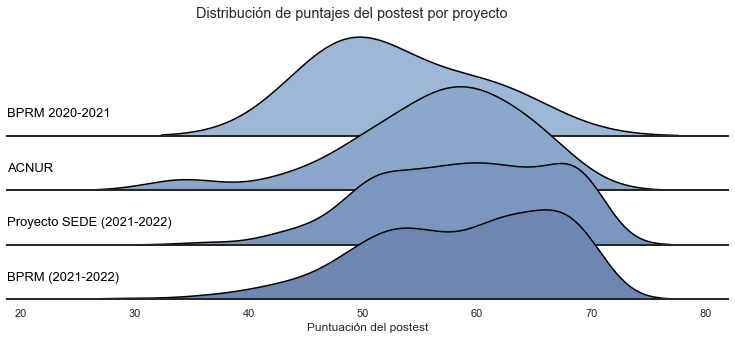

In [71]:
#Construcción del ridgeplot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
#palette = sns.color_palette("Set2", 12)
pal = sns.cubehelix_palette(10, rot=-.13, light=.7)
g = sns.FacetGrid(df_dd, palette=pal, row="proyecto", hue="proyecto", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="puntuacion_post", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="puntuacion_post", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "proyecto")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Puntuación del postest")
g.despine( left=True)
plt.suptitle('Distribución de puntajes del postest por proyecto', y=0.98)

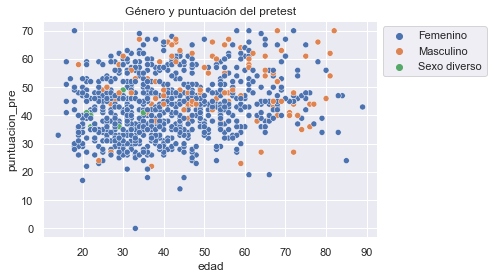

In [88]:
#Gráfico de dispersión para edad y puntuación del pretest
sns.set_style('darkgrid', {'legend.frameon':True})
sns.scatterplot(data=df_dd, x="edad", y="puntuacion_pre", hue="genero").set(title='Género y puntuación del pretest')
plt.legend(loc = 2, bbox_to_anchor = (1,1))

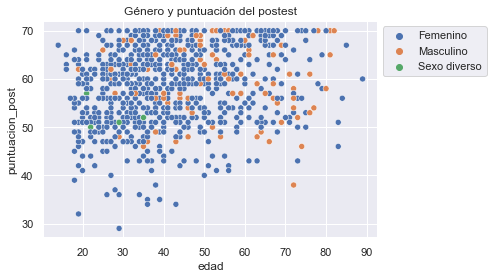

In [89]:
#Gráfico de dispersión para edad y puntuación del postest
sns.set_style('darkgrid', {'legend.frameon':True})
sns.scatterplot(data=df_dd, x="edad", y="puntuacion_post", hue="genero").set(title='Género y puntuación del postest')
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [17]:
#Conversión a variables dummies
df_dummies = pd.get_dummies(df_dd, columns=['localidad', 'proyecto','genero'])
df_dummies.head()

,edad,fase_test,puntuacion_pre,puntuacion_post,localidad_Amazonas,localidad_Barinas,localidad_Caracas,localidad_Coro,localidad_Guasdualito,localidad_Machiques,...,localidad_San Cristóbal,localidad_Santa Bárbara,localidad_Santa Elena de Uairén,proyecto_ACNUR,proyecto_BPRM (2021-2022),proyecto_BPRM 2020-2021,proyecto_Proyecto SEDE (2021-2022),genero_Femenino,genero_Masculino,genero_Sexo diverso
21,38,Postest,39.0,49,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
22,49,Postest,46.0,61,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,50,Postest,38.0,49,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
45,20,Postest,29.0,61,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
46,30,Postest,33.0,62,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [18]:
#Eliminación de una columna sobrante
df_dummies_clean = df_dummies.drop(['fase_test'], axis=1)
df_dummies_clean

,edad,puntuacion_pre,puntuacion_post,localidad_Amazonas,localidad_Barinas,localidad_Caracas,localidad_Coro,localidad_Guasdualito,localidad_Machiques,localidad_Maracaibo,...,localidad_San Cristóbal,localidad_Santa Bárbara,localidad_Santa Elena de Uairén,proyecto_ACNUR,proyecto_BPRM (2021-2022),proyecto_BPRM 2020-2021,proyecto_Proyecto SEDE (2021-2022),genero_Femenino,genero_Masculino,genero_Sexo diverso
21,38,39.0,49,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
22,49,46.0,61,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,50,38.0,49,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
45,20,29.0,61,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
46,30,33.0,62,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,39,29.0,35,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2124,36,35.0,49,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2125,34,45.0,68,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2126,29,32.0,49,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [19]:
#Definición de los ejes para el modelo
x = df_dummies_clean.drop(['puntuacion_post'], axis = 1).values
y = df_dummies_clean['puntuacion_post'].values

In [20]:
#Importación del modelo de regresión lineal múltiple y el entramiento
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [21]:
#Continuación del entenamiento
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [22]:
#Obtención del R2
y_pred = ml.predict(x_test)
r2_score(y_test,y_pred)

0.32922739901740816

Text(0.5, 1.0, 'Actual vs Predicted')

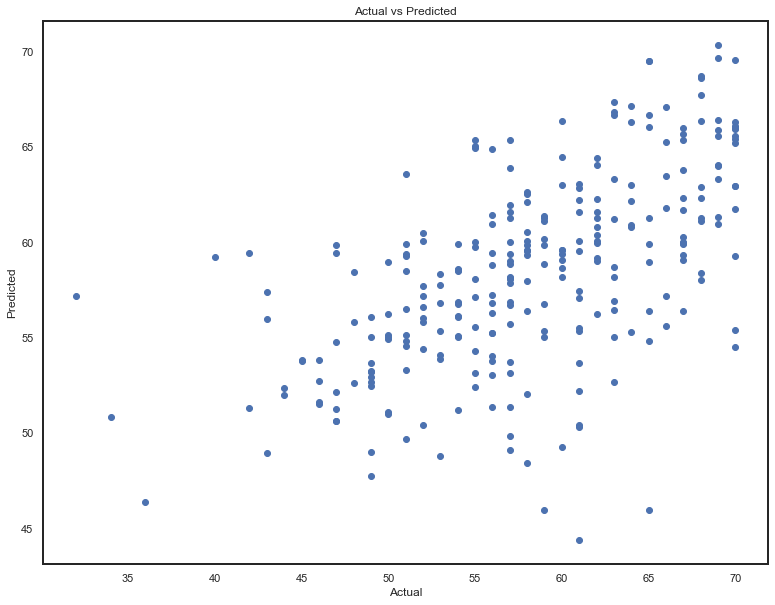

In [23]:
#Gráfico de dispersión para valores obtenidos y valores esperados.
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Análisis Nº 2 (Incluyendo estatus legal y eliminando filas nulas)

In [25]:
# Revisión de la base
df_dd

,localidad,proyecto,edad,genero,fase_test,puntuacion_pre,puntuacion_post
21,San Antonio,BPRM 2020-2021,38,Femenino,Postest,39.0,49
22,San Antonio,BPRM 2020-2021,49,Femenino,Postest,46.0,61
23,San Antonio,BPRM 2020-2021,50,Femenino,Postest,38.0,49
45,Machiques,ACNUR,20,Femenino,Postest,29.0,61
46,Machiques,ACNUR,30,Femenino,Postest,33.0,62
...,...,...,...,...,...,...,...
2123,Puerto Ordaz,ACNUR,39,Femenino,Postest,29.0,35
2124,San Cristóbal,Proyecto SEDE (2021-2022),36,Femenino,Postest,35.0,49
2125,Machiques,BPRM (2021-2022),34,Femenino,Postest,45.0,68
2126,San Cristóbal,Proyecto SEDE (2021-2022),29,Femenino,Postest,32.0,49


In [26]:
#Eliminación de columbras sobrantes
df_legal_status = new_df.drop(['me_he_sentido_optimista','me_he_sentido_util','me_he_sentido_relajado', 'he_sentido_interes_por_los_demas','he_tenido_energia_de_sobra','he_afrontado_bien_los _problemas','he_podido_pensar_con_claridad',
'me_he_sentido_bien_conmigo','me_he_sentido_cercano','me_he_sentido_seguro_con_confianza','he_sido_capaz_de_tomar_decisiones',
'me_he_sentido_querido','me_he_interesado_por_nuevas_cosas','me_he_sentido_alegre','aumento_de_bienestar',
'indicador_de_carga','fecha_aplicacion'], axis=1)
df_legal_status.head()

,localidad,proyecto,edad,genero,poblacion_local_extranjera,fase_test,puntuacion_pretest,puntuacion_total_items
21,San Antonio,BPRM 2020-2021,38,Femenino,NaN,Postest,39.0,49
22,San Antonio,BPRM 2020-2021,49,Femenino,NaN,Postest,46.0,61
23,San Antonio,BPRM 2020-2021,50,Femenino,NaN,Postest,38.0,49
45,Machiques,ACNUR,20,Femenino,NaN,Postest,29.0,61
46,Machiques,ACNUR,30,Femenino,NaN,Postest,33.0,62


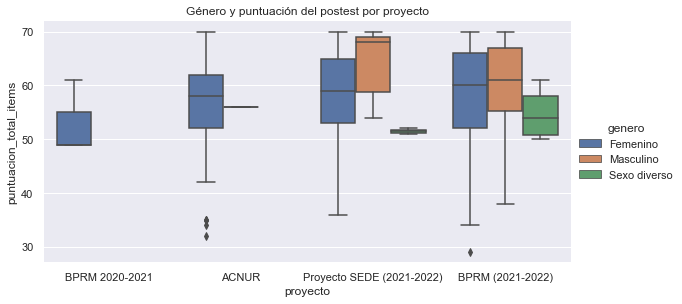

In [91]:
#Boxplot de proyecto, género y puntuación en el postest
g = sns.catplot(x="proyecto", y="puntuacion_total_items",
                hue="genero",
                data=df_legal_status, kind="box",
                height=4, aspect=2).set(title='Género y puntuación del postest por proyecto');

In [27]:
#Eliminación de filas con valores nulos
df_ls = df_legal_status.dropna()
df_ls

,localidad,proyecto,edad,genero,poblacion_local_extranjera,fase_test,puntuacion_pretest,puntuacion_total_items
51,San Antonio,Proyecto SEDE (2021-2022),41,Femenino,Población local,Postest,38.0,63
56,San Antonio,Proyecto SEDE (2021-2022),24,Femenino,Población local,Postest,52.0,69
58,San Antonio,Proyecto SEDE (2021-2022),29,Femenino,Población local,Postest,29.0,61
61,San Antonio,Proyecto SEDE (2021-2022),38,Femenino,Población local,Postest,32.0,62
113,San Antonio,Proyecto SEDE (2021-2022),25,Femenino,Población local,Postest,34.0,60
...,...,...,...,...,...,...,...,...
2123,Puerto Ordaz,ACNUR,39,Femenino,Población local,Postest,29.0,35
2124,San Cristóbal,Proyecto SEDE (2021-2022),36,Femenino,Población local,Postest,35.0,49
2125,Machiques,BPRM (2021-2022),34,Femenino,Refugiado o solicitante de refugio,Postest,45.0,68
2126,San Cristóbal,Proyecto SEDE (2021-2022),29,Femenino,Población local,Postest,32.0,49


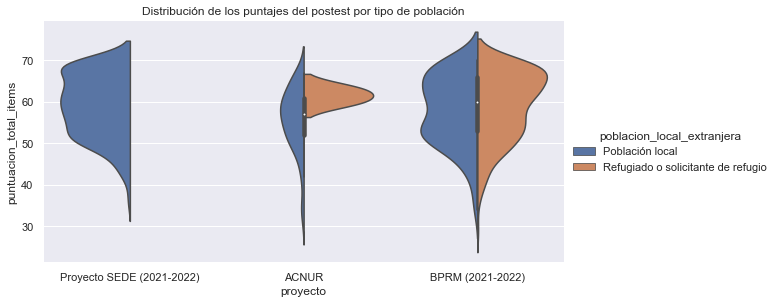

In [92]:
#Gráfico de violín dividido sobre la distribución de ambos tipos de poblaciones por proyecto
g = sns.catplot(x="proyecto", y="puntuacion_total_items",
                hue="poblacion_local_extranjera",
                data=df_ls, kind="violin", split=True,
                height=4, aspect=2).set(title='Distribución de los puntajes del postest por tipo de población');

In [29]:
#Conversión a variables dummies
df_dummies2 = pd.get_dummies(df_ls, columns=['localidad', 'proyecto','genero',"poblacion_local_extranjera"])
df_dummies2.head()

,edad,fase_test,puntuacion_pretest,puntuacion_total_items,localidad_Amazonas,localidad_Barinas,localidad_Caracas,localidad_Coro,localidad_Guasdualito,localidad_Machiques,...,localidad_Santa Bárbara,localidad_Santa Elena de Uairén,proyecto_ACNUR,proyecto_BPRM (2021-2022),proyecto_Proyecto SEDE (2021-2022),genero_Femenino,genero_Masculino,genero_Sexo diverso,poblacion_local_extranjera_Población local,poblacion_local_extranjera_Refugiado o solicitante de refugio
51,41,Postest,38.0,63,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
56,24,Postest,52.0,69,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
58,29,Postest,29.0,61,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
61,38,Postest,32.0,62,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
113,25,Postest,34.0,60,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [30]:
#Eliminación de una columna sobrante
df_dummies_clean2 = df_dummies2.drop(['fase_test'], axis=1)
df_dummies_clean2

,edad,puntuacion_pretest,puntuacion_total_items,localidad_Amazonas,localidad_Barinas,localidad_Caracas,localidad_Coro,localidad_Guasdualito,localidad_Machiques,localidad_Maracaibo,...,localidad_Santa Bárbara,localidad_Santa Elena de Uairén,proyecto_ACNUR,proyecto_BPRM (2021-2022),proyecto_Proyecto SEDE (2021-2022),genero_Femenino,genero_Masculino,genero_Sexo diverso,poblacion_local_extranjera_Población local,poblacion_local_extranjera_Refugiado o solicitante de refugio
51,41,38.0,63,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
56,24,52.0,69,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
58,29,29.0,61,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
61,38,32.0,62,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
113,25,34.0,60,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,39,29.0,35,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2124,36,35.0,49,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2125,34,45.0,68,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2126,29,32.0,49,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [31]:
#Renombre de columnas
df_dummies_clean22 = df_dummies_clean2.rename(columns={'puntuacion_pretest':'puntuacion_pre','puntuacion_total_items':'puntuacion_post'})
df_dummies_clean22.head()

,edad,puntuacion_pre,puntuacion_post,localidad_Amazonas,localidad_Barinas,localidad_Caracas,localidad_Coro,localidad_Guasdualito,localidad_Machiques,localidad_Maracaibo,...,localidad_Santa Bárbara,localidad_Santa Elena de Uairén,proyecto_ACNUR,proyecto_BPRM (2021-2022),proyecto_Proyecto SEDE (2021-2022),genero_Femenino,genero_Masculino,genero_Sexo diverso,poblacion_local_extranjera_Población local,poblacion_local_extranjera_Refugiado o solicitante de refugio
51,41,38.0,63,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
56,24,52.0,69,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
58,29,29.0,61,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
61,38,32.0,62,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
113,25,34.0,60,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [32]:
#Definición de los ejes para el modelo
x = df_dummies_clean22.drop(['puntuacion_post'], axis = 1).values
y = df_dummies_clean22['puntuacion_post'].values

In [33]:
# Importación y entrenamiento del modelo
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [34]:
# Continuación delentrenamiento
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [35]:
# R2 de este análisis
y_pred = ml.predict(x_test)
r2_score(y_test,y_pred)

0.32982396424271765